# 1-Dimensional Time-independent Schrödinger Equation



The 1-dimensional time-dependent Schrödinger equation is given by:

$$
i \hbar \frac{\partial \Psi(x,t)}{\partial t} = -\frac{\hbar^2}{2m} \frac{\partial^2 \Psi(x,t)}{\partial x^2} + V(x,t) \Psi(x,t)
$$

Where:
- $\Psi(x,t)$ is the wave function of the particle,
- $\hbar$ is the reduced Planck's constant,
- $m$ is the mass of the particle,
- $V(x,t)$ is the potential energy,
- $x$ is the position,
- $t$ is the time.

It's easy to prove that if 
$$
V(x,t)=V(x),\; \forall t \in \mathbb{R}
$$
the wave functions that solve the Schrödinger equations have the following form:
$$
\Psi(x,t)=\phi_n(t)\psi_n(x) = e^{-i\frac{E_n}{\hbar}t}\psi_n(x),
$$
where $E_n$ and $\psi_n(x)$ are respectively the n-th eigenvalue and its corresponding normalized eigenfunction that solve the following equation (**time independent Schrödinger equation**):
$$
\hat{H}\psi(x)=E\psi(x).
$$
The hamiltonian operator $\hat{H}$ is defined as follows:
$$
\hat{H}=-\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2} + V(x),
$$
So we can finally express the time independent Schrödinger equation as:
$$
-\frac{\hbar^2}{2m} \frac{\partial^2\psi(x)}{\partial x^2} + V(x)\psi(x)=E\psi(x).
$$


Now the question is: how can we numerically solve the time-independent Schrödinger equation?

Here I'll try to explain it in the case of a **particle bounded in a certain region of space**.

**Step #1: Let's bound our particle**<br>
We assume that our particle is bounded in a region of the space $x \in (0,L)$.
This assumption is not so limiting, in fact this implies that the square module of the wave-function $|\psi(x)|^2$ is such that
$$
|\psi(x)|^2 = 0,\;x \leq 0 \land x\geq L,
$$
in other words, the probability to find the particle in the region of space out of the interval $(0,L)$ is 0.
This is a reasonable assumption since generally the probability of finding the particle for regions that are too far from our region of interest tends to be 0.
So we can rewrite out problem as follows:
$$
-\frac{\hbar^2}{2m} \frac{\partial^2\psi(x)}{\partial x^2} + V(x)\psi(x)=E\psi(x),\;\;x\in(0,L),\;\;\psi(0)=\psi(L)=0.
$$

**Step #2: Discretization**<br>
We need to move from a continuous domain in space to a discrete domain in space. So we divide our continuous domain into $n$ tiny equally sized intervals $\Delta x$. By doing this, it's easy to see that we can focus just on $n+1$ points: $x_0,x_1,...x_n$.<br>
In other terms, instead of considering a continuous complex function $\psi(x)$, we need to concentrate on a discrete complex function $\psi(x_i),\;0\leq i\leq n$.<br>
We also need to find a good approximantion of the second derivative of a function evaluated in these points.
A good and accurate approximation method known as 'central difference method' is:
$$
\frac{\partial^2\psi(x)}{\partial x^2}\Bigg|_{x=x_i} \approx \frac{\psi(x_{i+1}) - 2\psi(x_i) + \psi(x_{i-1})}{\Delta x^2}.
$$
So it turns out that our differential equation turns into finite difference problem like this:
$$
\left\{
\begin{aligned}
&\psi(x_0) = 0,\\\\
&-\frac{\hbar^2}{2m}\frac{\psi(x_{i+1}) - 2\psi(x_i) + \psi(x_{i-1})}{\Delta x^2} + V(x_i)\psi(x_i)=E\psi(x_i),\;\;0\lt i\lt n,\\\\
&\psi(x_n) = 0
\end{aligned}
\right.
$$
After some manipulations we come this expression:
$$
\left\{
\begin{aligned}
&\psi(x_0) = 0,\\\\
&-\frac{1}{2\Delta x^2}\psi(x_{i+1}) + \frac{1}{\Delta x^2}\psi(x_i) - \frac{1}{2\Delta x^2}\psi(x_{i-1}) +\frac{m}{\hbar^2} V(x_i)\psi(x_i)=E\frac{m}{\hbar^2}\psi(x_i),\;\;0\lt i\lt n,\\\\
&\psi(x_n) = 0
\end{aligned}
\right.
$$
Now the question is: is there a function $\psi$ that is a solution of the previous system of N+1 expressions? Is it unique? Are there only admittable values of the energy $E$?<br>
The questions can be answered only with linear algebra, in fact we can express the central recursive epression in the previous system in a matrix form in which each row has three non-zero elements: one laying on the diagonal one immediately before it and one immediately after it.<br> Let's see it better here just considering the case where n = 5 (6 points).<br>We exclude the first and the last point which fix our boundary condition, then we focus on the other four points:
$$
\left\{
\begin{aligned}
& \left(\frac{m}{\hbar^2}V(x_1) + \frac{1}{\Delta x^2}\right)\psi(x_1) - \frac{1}{2\Delta x^2}\psi(x_{2}) &= E\frac{m}{\hbar^2}\psi(x_1),\\\\
&-\frac{1}{2\Delta x^2} \psi(x_{1}) +\left(\frac{m}{\hbar^2}V(x_2) + \frac{1}{\Delta x^2}\right)\psi(x_2) -\frac{1}{2\Delta x^2}\psi(x_{3}) &= E\frac{m}{\hbar^2}\psi(x_2),\\\\
&-\frac{1}{2\Delta x^2} \psi(x_{2}) +\left(\frac{m}{\hbar^2}V(x_3) + \frac{1}{\Delta x^2}\right)\psi(x_3) -\frac{1}{2\Delta x^2}\psi(x_{4}) &= E\frac{m}{\hbar^2}\psi(x_3),\\\\
&-\frac{1}{2\Delta x^2} \psi(x_{3}) +\left(\frac{m}{\hbar^2}V(x_4) + \frac{1}{\Delta x^2}\right)\psi(x_4) &= E\frac{m}{\hbar^2}\psi(x_4),
\end{aligned}
\right.
$$
So, for this example n = 5 (6 points) $\psi(x_0)=\psi(x_5)=0$ and we have to solve the following matrix equation:
$$
\begin{bmatrix}
\frac{m}{\hbar^2}V(x_1) + \frac{1}{\Delta x^2} & - \frac{1}{2\Delta x^2} & 0 & 0 \\
-\frac{1}{2\Delta x^2} & \frac{m}{\hbar^2}V(x_2) + \frac{1}{\Delta x^2} & - \frac{1}{2\Delta x^2} & 0 \\
0 & -\frac{1}{2\Delta x^2} & \frac{m}{\hbar^2}V(x_3) + \frac{1}{\Delta x^2} & - \frac{1}{2\Delta x^2} \\
0 & 0 & -\frac{1}{2\Delta x^2} & \frac{m}{\hbar^2}V(x_4) + \frac{1}{\Delta x^2}
\end{bmatrix}
\begin{bmatrix}
\psi(x_1) \\
\psi(x_2) \\
\psi(x_3) \\
\psi(x_4)
\end{bmatrix}
= E\frac{m}{\hbar^2}
\begin{bmatrix}
\psi(x_1) \\
\psi(x_2) \\
\psi(x_3) \\
\psi(x_4)
\end{bmatrix}
$$
What we have here is a classical eigenvalue problem involving a tridiagonal hermitian matrix, whose eigenvalues are real and strongly depend on the information encoded along the main diagonal, which involves the only changing part of the problem that is the potentential evengy evaluated along the all the points we're taking into account.
So in general, if we split our domain into $n$ intervals, we have $n+1$ points equally spaced of an interval equal to $\Delta x$, and we have to solve a system of $n-1$ equations of the following form:
$$
\mathbf{A}\psi = \lambda\psi,\;\;\text{(Eq.1)}
$$
where $A$ is a $(n-1)\times(n-1)$ tridiagonal matrix:
$$
A = 
\begin{bmatrix}
d_1 & \alpha & 0 & 0 & \cdots & 0 \\
\alpha & d_2 & \alpha & 0 & \cdots & 0 \\
0 & u_2 & d_3 & \alpha & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \alpha & d_{n-2} & \alpha \\
0 & 0 & \cdots & 0 & \alpha & d_{n-1}
\end{bmatrix},\;\;\alpha=-\frac{1}{2\Delta x^2},\;\;d_i=\frac{m}{\hbar^2}V(x_i) + \frac{1}{\Delta x^2}
$$
What about $\lambda=E\frac{m}{\hbar^2}$?
Here we have to do some important consideration:
1. The eigenvalue equation in (Eq.1) extracts $n-1$ real eigenvalues $\lambda_i$ from the matrix A (possibly repeated).
2. If the algebraic multiplicity of $\lambda_k$ is 1, we can exxtract a $(n-1)$-dimensional normalized eigenvector $\psi_k$ which solves the following equation: $\mathbf{A}\psi_k = \lambda_k\psi_k$.
3. If the algebraic multiplicity of $\lambda_k$ is $m$ then we can extract $m$ mutual orthogonal $(n-1)$-dimensional normalized eigenvectors which solve the following equation $\mathbf{A}\psi_k = \lambda_{k}\psi_{kj},\;j=1..m$
4. All the $n-1$ normalized eigenvectors are mutually orthonormal
5. Since $\lambda$ has discrete value, it turns out that also the energy E has discrete values, in fact we have
$$
E_i = \lambda_i\frac{\hbar^2}{m}
$$
6. The more $n$ increases, the more higher energy information is retrieved in terms of eigenvalues and their corresponding eigenfunctions.

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
import random
from matplotlib.animation import FuncAnimation,PillowWriter
from io import BytesIO
import base64
from IPython.display import display, HTML

#We use the CGS convention

#hbar [erg*s]
h_bar = 1.055e-27
#mass of the electron [g]
m = 9.10938e-28
#Size of the region [cm]
L = 0.2e-7
#number of intervals (n+1 points)
n = 2000
#interval length [cm]
dx = L/n
#create a vector of n+1 x-coordinates from 0 to L
x = np.linspace(0,L,n+1)

In [107]:
#Here we can define our potential energy. Here I am returning a quadratic potential as a (n-1) dimensional vector 
#We are ruling out the potential energy at the point x_0 and at the point x_n
def V(x):
    #return 4e-5*((x[1:-1]-L/2)**2) #quadratic potential energy
    return np.zeros(len(x)-2)

In [108]:
#x-axis where our eigenfunctions are defined
xaxis = x[1:-1]

#Definition of the main diagonal of the matrix A and of its upper/lower diagonals
A_diag = (m/(h_bar**2))*V(x)+(1/(dx**2))*np.ones(n-1)
A_upper_lower_diag = (-0.5/(dx**2))*np.ones(len(A_diag)-1)

#Eigenvalues problem solving for the tridiagona matrix A
#eigenvectors is a matrix whose columns [:,k] are eigenvectors associated with their own corresponding eigenvalue[k]
(eigenvalues,eigenvectors) = eigh_tridiagonal(A_diag,A_upper_lower_diag)

#init the array of the energy levels
energy_level = np.zeros(len(eigenvalues))
#transpose of the matrix of the eigenfunctions in order to have each eigenfunction as a row of this matrix
psi = eigenvectors.T
#square all the elements of all the psi functions
psi_squared = psi**2

#Psi normalization
for i in range(len(psi)):

    #calculation of the integral of the i-th psi_squared function 
    # trapezoidal method used (an alternative to the integral calculation with dx*np.sum(psi_squared[i]))
    norm_factor = np.trapz(psi_squared[i], xaxis)
    #normalization of psi_squared
    psi_squared[i] = psi_squared[i]/norm_factor
    #scaling of the wave functions
    psi[i] = psi[i]/np.sqrt(norm_factor)
    #extraction of the energy levels from the eigenvalues of A
    energy_level[i] = eigenvalues[i]*((h_bar**2)/m)



C:\Users\Notebook Asus\AppData\Local\Temp\ipykernel_20544\424944926.py:24: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  norm_factor = np.trapz(psi_squared[i], xaxis)


From here on, we'll focus on the first five energy levels. from $E_0$ (the ground level) to $E_4$.<br>
The probability density functions are firstly shown at each corresponding energy level, finally the real and imaginary part of the wave function $\Psi_k(x,t)$ will be shown in an animation, demonstrating the oscillatory behaviour of these components (stationary waves), even if its squared module is not depending on time.

In [109]:
#Number of curves that will be shown on the following plots
N_curves = 5

#Random clear and human-visible color generator ( to paint our curves :-) )
def random_clear_color():
    # Generate random values for R, G, and B channels ensuring they are not too light
    # Avoid too light (200-255)
    r = random.randint(0, 200)  
    g = random.randint(0, 200)
    b = random.randint(0, 200)
    
    # Convert the RGB values to the hex format #RRGGBB
    hex_color = f"#{r:02X}{g:02X}{b:02X}"
    
    return hex_color

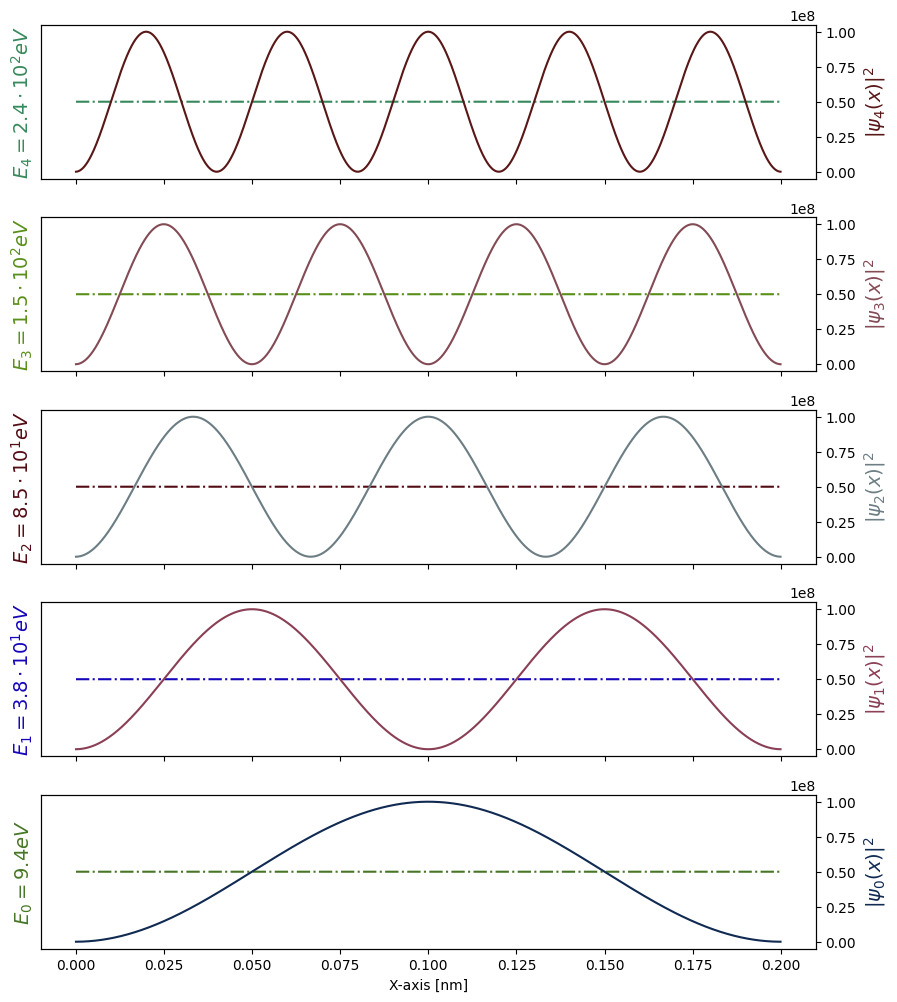

In [110]:
# Create the figure with stacked plots, each having two independent y-axes (left and right) and a commom x-axis
fig, left_axes = plt.subplots(nrows=N_curves, ncols=1, sharex=True, figsize=(10, 12))
#information of the plots about the right y-axis
right_axes = []

#ciclyng for each subplot
for i in range(N_curves):

    #choosing randomly our curves/labels colors for each axis
    random_color_y_left = random_clear_color()
    random_color_y_right = random_clear_color()
    
    #xaxis is scaled from [cm] to [nm]
    #plotting the energy level (on the left y-axis) as an horizontal line
    left_axes[N_curves-i-1].plot(xaxis*1.0e7, energy_level[i]*np.ones(len(xaxis)),color = random_color_y_left,linestyle='-.')
    
    #creating a second y-axis in this subplot, granting the same xasis
    right_axes.append(left_axes[N_curves-i-1].twinx())
    #plotting the squared psi function on the right y-axis (xaxis scaled from [cm] to [nm])
    right_axes[i].plot(xaxis*1.0e7, psi_squared[i],color = random_color_y_right)

    #hiding the values on the left axis
    left_axes[N_curves-i-1].tick_params(axis = 'y',which='both',left=False,labelleft=False)
    #scaling energy values from [erg] to [eV]
    ev_energy = energy_level[i]*6.242e+11

    #######################################
    #some dressing on the left axis
    #######################################
    left_axis_str = r'$E_'+str(i)+'='+f"{ev_energy:.1e}"+"eV$"
    left_axis_str = left_axis_str.replace("e-00","").replace("e+00","").replace("e-0","e-").replace("e+0","e+")
    if ("e-" in left_axis_str) or ("e+" in left_axis_str):
        left_axis_str = left_axis_str.replace("e+","\\cdot 10^{").replace("e-","\\cdot 10^{-").replace("eV$","}eV$")    
    left_axes[N_curves-i-1].set_ylabel(left_axis_str,color=random_color_y_left,fontsize=14)
    #######################################

    #some dressing on the right axis
    right_axes[i].set_ylabel(r'$|\psi_'+str(i)+'(x)|^{2}$',color = random_color_y_right,fontsize=14)
#end of the for cycle

#fixing text on the common X-axis
left_axes[N_curves-1].set_xlabel('X-axis [nm]')

#compactig the subplots
plt.subplots_adjust(hspace=0.25)

# Showing the plot
plt.show()

In [151]:
# Animation update function
higher_omega = energy_level[0]/h_bar
num_frames = 300
dt = higher_omega*num_frames
axes = []

for i in range(N_curves):
    right_axes[i].cla()
    right_axes[i].set_ylim(-max(abs(psi[i])),max(abs(psi[i])))
    axes.append(right_axes[i].plot(xaxis * 1.0e7, np.zeros(len(xaxis)))[0])
    axes.append(right_axes[i].plot(xaxis * 1.0e7, np.zeros(len(xaxis)))[0])


def update(frame):
    
    for i in range(N_curves):
        # Update the psi squared function
        sin_cos_arg = (energy_level[i]/h_bar)*((2*np.pi*frame)/dt)
        axes[2*i].set_ydata(psi[i]*np.cos(sin_cos_arg)) # Redraw with new data
        axes[2*i+1].set_ydata(psi[i]*np.sin(sin_cos_arg)) # Redraw with new data

    return axes  # Return all the axes for updating

# Create the animation
ani = FuncAnimation(fig, update, frames=num_frames, interval=150, blit=True)

ani.save(filename="test13.html", writer="html")

In [152]:
from IPython.display import display, HTML

# Use the proper HTML format to display the GIF
display(HTML("test13.html"))